# Introduction to Pandas

## 1. What is pandas?
## Pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool, built on top of the Python programming language.
## 2. Why is pandas so popular?
## Pandas is the *de facto* standard in data analysis and data manipulation in Python. In the backend it stores data as NumPy arrays, which in turns gives C-like performance whilst mantaining code simplicity.
## 3. Any drawback to be aware off?
## Pandas is very memory consuming, if a .csv file is X MB, you should expect pandas to take around 5-10 X memory in your RAM. This becomes a problem if you want to load several GB worth of data. Hence, scalability is not ideal and other technologies should be considered to ingest GB or TB sized data streams


# Pandas Series

## Pandas series are the simplest structure available in Pandas. They, describe a dataset labelled by a index and a single column. For instance, this could be a time-series of a stock price. 

### To create a DataFrame we use the method ```pd.Series()``` (https://pandas.pydata.org/docs/reference/api/pandas.Series.html)

### One of the easyest ways to create a Series is using a dictionary. The keys of the dictionary will be transformed into indices and the values will be the corresponding values

In [1]:
!py -3.11 -m pip install matplotlib


[notice] A new release of pip available: 22.3 -> 24.3.1
[notice] To update, run: C:\Users\aitor\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
print(pd.__version__)

2.2.3


In [3]:
my_series=pd.Series(data={"a":1,"b":2,"c":3})
my_series

a    1
b    2
c    3
dtype: int64

### One can create more complex series by feeding the index and data separately

In [4]:
import pandas as pd
import numpy as np
# We create a date range
dates = pd.date_range('20200101', periods=200)
# And some random values for a stock
stock_value=100+np.random.normal(0,1,200)

df = pd.Series(data=stock_value, index=dates, name='stock_price')

print(df)
print(type(df))

2020-01-01     99.640253
2020-01-02    100.609732
2020-01-03    100.130110
2020-01-04     98.980432
2020-01-05    101.176810
                 ...    
2020-07-14    100.204928
2020-07-15    100.952505
2020-07-16    101.770514
2020-07-17     97.597994
2020-07-18     98.910539
Freq: D, Name: stock_price, Length: 200, dtype: float64
<class 'pandas.core.series.Series'>


### We can access the index attribute using the ```.index``` attribute and we can access the values using the ```.values``` attribute

In [5]:
df.index

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10',
               ...
               '2020-07-09', '2020-07-10', '2020-07-11', '2020-07-12',
               '2020-07-13', '2020-07-14', '2020-07-15', '2020-07-16',
               '2020-07-17', '2020-07-18'],
              dtype='datetime64[ns]', length=200, freq='D')

In [6]:
df.values

array([ 99.64025251, 100.60973188, 100.13010993,  98.98043192,
       101.17681024,  98.887651  , 101.04418966, 100.72540316,
        99.38591103, 101.04271137,  98.9225675 ,  99.84382881,
       101.41170694,  98.61416735, 100.50261676,  99.800157  ,
       100.23305978, 100.45726176,  99.22754341, 101.6508925 ,
       100.7348644 , 100.49948794, 100.41439338, 101.62226356,
        99.31162303, 100.73102042, 100.80726935,  99.5159462 ,
       100.33118444, 100.3055231 , 101.9858326 ,  99.68600932,
        99.44370439,  98.97625902,  98.71632236,  99.49304053,
       102.27043331, 101.35070942, 100.64303099, 100.8128518 ,
        99.80636888, 101.39083204,  99.89566802, 100.84219146,
        98.93266689, 100.32779753,  98.702014  ,  97.83115591,
       100.12522119, 100.25078917, 102.05890883,  99.0356031 ,
        98.53285858, 100.63063283,  97.93082251,  99.95485873,
       100.69583437, 101.26850116, 100.77021014,  98.09634791,
       101.37779377,  98.45416205,  99.00768648,  99.76

### To access elements of the series, we can use slicing similar to numpy arrays and lists. The big difference is that we need to use the index keys to access elements or ranges

In [7]:
print(df[::2])#valid
print("----------------")
print(df[:-10])
print("----------------")
print(df[1:-10])

2020-01-01     99.640253
2020-01-03    100.130110
2020-01-05    101.176810
2020-01-07    101.044190
2020-01-09     99.385911
                 ...    
2020-07-09    100.331927
2020-07-11     99.618363
2020-07-13    101.150745
2020-07-15    100.952505
2020-07-17     97.597994
Freq: 2D, Name: stock_price, Length: 100, dtype: float64
----------------
2020-01-01     99.640253
2020-01-02    100.609732
2020-01-03    100.130110
2020-01-04     98.980432
2020-01-05    101.176810
                 ...    
2020-07-04     97.630357
2020-07-05    100.383181
2020-07-06    101.043750
2020-07-07    100.525233
2020-07-08    100.645914
Freq: D, Name: stock_price, Length: 190, dtype: float64
----------------
2020-01-02    100.609732
2020-01-03    100.130110
2020-01-04     98.980432
2020-01-05    101.176810
2020-01-06     98.887651
                 ...    
2020-07-04     97.630357
2020-07-05    100.383181
2020-07-06    101.043750
2020-07-07    100.525233
2020-07-08    100.645914
Freq: D, Name: stock_price, 

### We can also range with dates, since they are the index

In [8]:
df['2020-01-01':'2020-04-03']

2020-01-01     99.640253
2020-01-02    100.609732
2020-01-03    100.130110
2020-01-04     98.980432
2020-01-05    101.176810
                 ...    
2020-03-30     99.763450
2020-03-31     99.679491
2020-04-01     99.919742
2020-04-02     99.928294
2020-04-03    100.307226
Freq: D, Name: stock_price, Length: 94, dtype: float64

### If we want to access scalar values we either use the correct index or the ```.at[index]``` method. The following are equivalent

In [9]:
%timeit df.at['2020-01-01']

29.1 μs ± 11.1 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [10]:
%timeit df['2020-01-01']

55.2 μs ± 3.36 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [11]:
print(df['2020-01-01'])
print(df.at['2020-01-01'])

99.64025251032444
99.64025251032444


### If we want to access slices we can also use the  ```.loc[array_index]``` method. The following are equivalent

In [12]:
print(df.loc[['2020-01-01','2020-01-03']])
print(df[['2020-01-01','2020-01-03']])

2020-01-01     99.640253
2020-01-03    100.130110
Name: stock_price, dtype: float64
2020-01-01     99.640253
2020-01-03    100.130110
Name: stock_price, dtype: float64


### **Note**: Indexes can be any array of objects in python, ordered or not. See examples below

In [13]:
# We create a index with a integer list
my_index=[3,2,1]
# And some random values for a stock
stock_value=100+np.random.normal(0,1,3)

df1 = pd.Series(stock_value, index=my_index, name='stock_price')

print(df1)
print(type(df1))
df1.index

3    100.787115
2     99.931976
1    100.108820
Name: stock_price, dtype: float64
<class 'pandas.core.series.Series'>


Index([3, 2, 1], dtype='int64')

In [14]:
# We create a index with a integer list
my_index=["Jan","Feb","Mar"]
# And some random values for a stock
stock_value=100+np.random.normal(0,1,3)

df2 = pd.Series(stock_value, index=my_index, name='stock_price')

print(df2)
print(type(df2))
df2.index

Jan     99.311982
Feb    100.403576
Mar    100.691056
Name: stock_price, dtype: float64
<class 'pandas.core.series.Series'>


Index(['Jan', 'Feb', 'Mar'], dtype='object')

###  Pandas series offer a number of functionalities, like plotting the data in a very straightforward manner (for more info visit https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.plot.html)

<Axes: title={'center': 'Stock value'}>

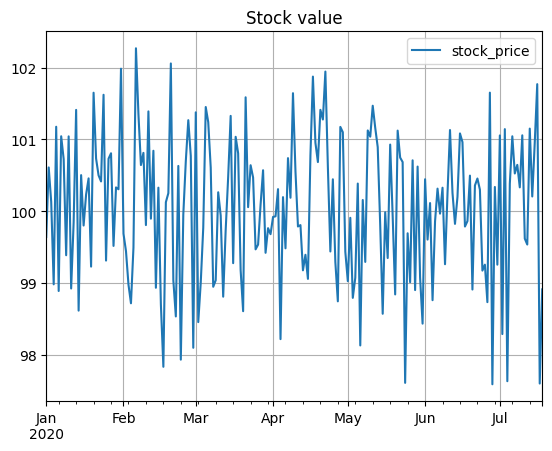

In [15]:
df.plot(title="Stock value",grid=True,legend=True)

### Another useful feature is to be able to display summary statistics of our data set using the ```.describe()```class method

In [16]:
df.describe()

count    200.000000
mean     100.050158
std        0.998069
min       97.587599
25%       99.292416
50%      100.191599
75%      100.752895
max      102.270433
Name: stock_price, dtype: float64

In [17]:
df.describe()["std"]

np.float64(0.9980694601447948)

### **Note:** the desribe method returns a series as well

In [18]:
type(df.describe())

pandas.core.series.Series

### We can also display first/last n rows using ```head(n)``` or ```tail(n)``` that also return series

In [19]:
df.head(5)

2020-01-01     99.640253
2020-01-02    100.609732
2020-01-03    100.130110
2020-01-04     98.980432
2020-01-05    101.176810
Freq: D, Name: stock_price, dtype: float64

In [20]:
type(df.head(5))

pandas.core.series.Series

In [21]:
df.tail(2)

2020-07-17    97.597994
2020-07-18    98.910539
Freq: D, Name: stock_price, dtype: float64

### **Note** that ```head(n)``` or ```tail(n)``` are equivalent to slicing with ```[:n]``` or ```[-n:]``` respectively

---
# Pandas DataFrames
### Before advancing further, let's introduce the concept of a dataframe. A Pandas DataFrame is a collection of Series labelled by the same index, e.g. it could be a collection of Series of Stock prices labelled by their timestamp. 

### To create a DataFrame we use the method ```pd.DataFrame()``` (https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html)


In [22]:
# We create a date range
dates = pd.date_range('20200101', periods=200)
# And some random values for a stock
stock_value=100+np.random.normal(0,1,(200,4))

df = pd.DataFrame(stock_value, index=dates, columns=['stock_a','stock_b','stock_c','stock_d'])

print(type(df))
df

<class 'pandas.core.frame.DataFrame'>


,stock_a,stock_b,stock_c,stock_d
2020-01-01,101.239267,102.076730,100.809822,101.204329
2020-01-02,99.766567,99.454514,99.797832,100.083366
2020-01-03,98.804073,100.208279,99.856908,100.020126
2020-01-04,101.531451,99.368287,100.870663,100.073132
2020-01-05,102.087374,101.172430,99.082159,101.005039
...,...,...,...,...
2020-07-14,99.152409,101.824001,102.410978,100.060254
2020-07-15,99.865097,101.329298,99.351808,99.404482
2020-07-16,100.519647,100.588801,101.044676,99.151376
2020-07-17,99.821333,101.396278,102.726043,98.202304


### Let's have a look at some examples looking at the```yfinance``` library

In [23]:
import yfinance

AAPL = yfinance.download(["AAPL"]) # gets Apple's data

[*********************100%***********************]  1 of 1 completed


In [24]:
AAPL

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
1980-12-12 00:00:00+00:00,0.098943,0.128348,0.128906,0.128348,0.128348,469033600
1980-12-15 00:00:00+00:00,0.093781,0.121652,0.122210,0.121652,0.122210,175884800
1980-12-16 00:00:00+00:00,0.086898,0.112723,0.113281,0.112723,0.113281,105728000
1980-12-17 00:00:00+00:00,0.089049,0.115513,0.116071,0.115513,0.115513,86441600
1980-12-18 00:00:00+00:00,0.091630,0.118862,0.119420,0.118862,0.118862,73449600
...,...,...,...,...,...,...
2024-10-23 00:00:00+00:00,230.759995,230.759995,235.139999,227.759995,234.080002,52287000
2024-10-24 00:00:00+00:00,230.570007,230.570007,230.820007,228.410004,229.979996,31109500


In [25]:
AAPL.columns=AAPL.columns.swaplevel(0, 1)

AAPL.loc[:,('AAPL')]

Price,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
1980-12-12 00:00:00+00:00,0.098943,0.128348,0.128906,0.128348,0.128348,469033600
1980-12-15 00:00:00+00:00,0.093781,0.121652,0.122210,0.121652,0.122210,175884800
1980-12-16 00:00:00+00:00,0.086898,0.112723,0.113281,0.112723,0.113281,105728000
1980-12-17 00:00:00+00:00,0.089049,0.115513,0.116071,0.115513,0.115513,86441600
1980-12-18 00:00:00+00:00,0.091630,0.118862,0.119420,0.118862,0.118862,73449600
...,...,...,...,...,...,...
2024-10-23 00:00:00+00:00,230.759995,230.759995,235.139999,227.759995,234.080002,52287000
2024-10-24 00:00:00+00:00,230.570007,230.570007,230.820007,228.410004,229.979996,31109500
2024-10-25 00:00:00+00:00,231.410004,231.410004,233.220001,229.570007,229.740005,38802300


In [26]:
AAPL = yfinance.download(["AAPL"])
AAPL=pd.DataFrame(AAPL.values,AAPL.index,columns=['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'])

[*********************100%***********************]  1 of 1 completed


In [27]:
AAPL

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12 00:00:00+00:00,0.098943,0.128348,0.128906,0.128348,0.128348,469033600.0
1980-12-15 00:00:00+00:00,0.093781,0.121652,0.122210,0.121652,0.122210,175884800.0
1980-12-16 00:00:00+00:00,0.086898,0.112723,0.113281,0.112723,0.113281,105728000.0
1980-12-17 00:00:00+00:00,0.089049,0.115513,0.116071,0.115513,0.115513,86441600.0
1980-12-18 00:00:00+00:00,0.091630,0.118862,0.119420,0.118862,0.118862,73449600.0
...,...,...,...,...,...,...
2024-10-23 00:00:00+00:00,230.759995,230.759995,235.139999,227.759995,234.080002,52287000.0
2024-10-24 00:00:00+00:00,230.570007,230.570007,230.820007,228.410004,229.979996,31109500.0
2024-10-25 00:00:00+00:00,231.410004,231.410004,233.220001,229.570007,229.740005,38802300.0


In [28]:
type(AAPL) # Check data typr

pandas.core.frame.DataFrame

### As mentioned, before ```yfinance``` provides us with a dataframe directly with a number of columns, that can then be accessed by typing ```dataframe.columns```, and likewise for the index, which can be accessed using  ```dataframe.index```. The values in turn, can be accessed using the attribute ```dataframe.vales```

In [29]:
AAPL.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [30]:
AAPL.index


DatetimeIndex(['1980-12-12 00:00:00+00:00', '1980-12-15 00:00:00+00:00',
               '1980-12-16 00:00:00+00:00', '1980-12-17 00:00:00+00:00',
               '1980-12-18 00:00:00+00:00', '1980-12-19 00:00:00+00:00',
               '1980-12-22 00:00:00+00:00', '1980-12-23 00:00:00+00:00',
               '1980-12-24 00:00:00+00:00', '1980-12-26 00:00:00+00:00',
               ...
               '2024-10-16 00:00:00+00:00', '2024-10-17 00:00:00+00:00',
               '2024-10-18 00:00:00+00:00', '2024-10-21 00:00:00+00:00',
               '2024-10-22 00:00:00+00:00', '2024-10-23 00:00:00+00:00',
               '2024-10-24 00:00:00+00:00', '2024-10-25 00:00:00+00:00',
               '2024-10-28 00:00:00+00:00', '2024-10-29 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='Date', length=11062, freq=None)

In [31]:
AAPL.values

array([[9.89431888e-02, 1.28347993e-01, 1.28905997e-01, 1.28347993e-01,
        1.28347993e-01, 4.69033600e+08],
       [9.37812626e-02, 1.21652000e-01, 1.22210003e-01, 1.21652000e-01,
        1.22210003e-01, 1.75884800e+08],
       [8.68979320e-02, 1.12723000e-01, 1.13280997e-01, 1.12723000e-01,
        1.13280997e-01, 1.05728000e+08],
       ...,
       [2.31410004e+02, 2.31410004e+02, 2.33220001e+02, 2.29570007e+02,
        2.29740005e+02, 3.88023000e+07],
       [2.33399994e+02, 2.33399994e+02, 2.34729996e+02, 2.32550003e+02,
        2.33320007e+02, 3.60288000e+07],
       [2.33880005e+02, 2.33880005e+02, 2.34210007e+02, 2.32320007e+02,
        2.33195007e+02, 1.45882350e+07]])

### ***Remark***: ```.values ``` casts a dataframe or series into a numpy array. Note that this operation will return a pure numpy array without the original index

---
# Quick comment on storing and loading dataframes
### Pandas offers a number of format compatibility like ```dataframe.to_csv``` .csv,  ```dataframe.to_pickle``` .pickle etc. The difference between picke and csv is that with pickle python will repect the types of index/values as opposed to csv where it will do a best guess

In [32]:
AAPL.to_csv('AAPL.csv',index=True)
pd.read_csv('AAPL.csv',index_col=0)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12 00:00:00+00:00,0.098943,0.128348,0.128906,0.128348,0.128348,469033600.0
1980-12-15 00:00:00+00:00,0.093781,0.121652,0.122210,0.121652,0.122210,175884800.0
1980-12-16 00:00:00+00:00,0.086898,0.112723,0.113281,0.112723,0.113281,105728000.0
1980-12-17 00:00:00+00:00,0.089049,0.115513,0.116071,0.115513,0.115513,86441600.0
1980-12-18 00:00:00+00:00,0.091630,0.118862,0.119420,0.118862,0.118862,73449600.0
...,...,...,...,...,...,...
2024-10-23 00:00:00+00:00,230.759995,230.759995,235.139999,227.759995,234.080002,52287000.0
2024-10-24 00:00:00+00:00,230.570007,230.570007,230.820007,228.410004,229.979996,31109500.0
2024-10-25 00:00:00+00:00,231.410004,231.410004,233.220001,229.570007,229.740005,38802300.0


### Note that we lost the type of the index

In [33]:
pd.read_csv('AAPL.csv',index_col=0).index

Index(['1980-12-12 00:00:00+00:00', '1980-12-15 00:00:00+00:00',
       '1980-12-16 00:00:00+00:00', '1980-12-17 00:00:00+00:00',
       '1980-12-18 00:00:00+00:00', '1980-12-19 00:00:00+00:00',
       '1980-12-22 00:00:00+00:00', '1980-12-23 00:00:00+00:00',
       '1980-12-24 00:00:00+00:00', '1980-12-26 00:00:00+00:00',
       ...
       '2024-10-16 00:00:00+00:00', '2024-10-17 00:00:00+00:00',
       '2024-10-18 00:00:00+00:00', '2024-10-21 00:00:00+00:00',
       '2024-10-22 00:00:00+00:00', '2024-10-23 00:00:00+00:00',
       '2024-10-24 00:00:00+00:00', '2024-10-25 00:00:00+00:00',
       '2024-10-28 00:00:00+00:00', '2024-10-29 00:00:00+00:00'],
      dtype='object', name='Date', length=11062)

In [34]:
AAPL.to_pickle('AAPL.pickle')
pd.read_pickle('AAPL.pickle')

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12 00:00:00+00:00,0.098943,0.128348,0.128906,0.128348,0.128348,469033600.0
1980-12-15 00:00:00+00:00,0.093781,0.121652,0.122210,0.121652,0.122210,175884800.0
1980-12-16 00:00:00+00:00,0.086898,0.112723,0.113281,0.112723,0.113281,105728000.0
1980-12-17 00:00:00+00:00,0.089049,0.115513,0.116071,0.115513,0.115513,86441600.0
1980-12-18 00:00:00+00:00,0.091630,0.118862,0.119420,0.118862,0.118862,73449600.0
...,...,...,...,...,...,...
2024-10-23 00:00:00+00:00,230.759995,230.759995,235.139999,227.759995,234.080002,52287000.0
2024-10-24 00:00:00+00:00,230.570007,230.570007,230.820007,228.410004,229.979996,31109500.0
2024-10-25 00:00:00+00:00,231.410004,231.410004,233.220001,229.570007,229.740005,38802300.0


In [35]:
pd.read_pickle('AAPL.pickle').index

DatetimeIndex(['1980-12-12 00:00:00+00:00', '1980-12-15 00:00:00+00:00',
               '1980-12-16 00:00:00+00:00', '1980-12-17 00:00:00+00:00',
               '1980-12-18 00:00:00+00:00', '1980-12-19 00:00:00+00:00',
               '1980-12-22 00:00:00+00:00', '1980-12-23 00:00:00+00:00',
               '1980-12-24 00:00:00+00:00', '1980-12-26 00:00:00+00:00',
               ...
               '2024-10-16 00:00:00+00:00', '2024-10-17 00:00:00+00:00',
               '2024-10-18 00:00:00+00:00', '2024-10-21 00:00:00+00:00',
               '2024-10-22 00:00:00+00:00', '2024-10-23 00:00:00+00:00',
               '2024-10-24 00:00:00+00:00', '2024-10-25 00:00:00+00:00',
               '2024-10-28 00:00:00+00:00', '2024-10-29 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='Date', length=11062, freq=None)

### Here pickle respects the original index type

---
# Back to DataFrames

## Slicing DataFrames

### Perhaps, not all the information in a dataframe is relevant to us and often case we want to either remove part of it or transform it. Let us start by selecting a single column from the dataframe above. There are a numbers of ways to do this operation:

In [36]:
# Let's assume we are interested in adjclose column in AAPL dataframe
AAPL_close=AAPL.Close # we can type explicitly the name of the column
print(type(AAPL_close))
AAPL_close

<class 'pandas.core.series.Series'>


Date
1980-12-12 00:00:00+00:00      0.128348
1980-12-15 00:00:00+00:00      0.121652
1980-12-16 00:00:00+00:00      0.112723
1980-12-17 00:00:00+00:00      0.115513
1980-12-18 00:00:00+00:00      0.118862
                                ...    
2024-10-23 00:00:00+00:00    227.759995
2024-10-24 00:00:00+00:00    228.410004
2024-10-25 00:00:00+00:00    229.570007
2024-10-28 00:00:00+00:00    232.550003
2024-10-29 00:00:00+00:00    232.320007
Name: Close, Length: 11062, dtype: float64

In [37]:
# Equivalently we can use 
AAPL_close=AAPL['Close'] # we can type explicitly the name of the column
print(type(AAPL_close))
AAPL_close

<class 'pandas.core.series.Series'>


Date
1980-12-12 00:00:00+00:00      0.128348
1980-12-15 00:00:00+00:00      0.121652
1980-12-16 00:00:00+00:00      0.112723
1980-12-17 00:00:00+00:00      0.115513
1980-12-18 00:00:00+00:00      0.118862
                                ...    
2024-10-23 00:00:00+00:00    227.759995
2024-10-24 00:00:00+00:00    228.410004
2024-10-25 00:00:00+00:00    229.570007
2024-10-28 00:00:00+00:00    232.550003
2024-10-29 00:00:00+00:00    232.320007
Name: Close, Length: 11062, dtype: float64

### We can also use the loc method, as opposed to series, for dataframes ```.loc``` takes two arguments ```.loc[array_index,array_columns]```

In [38]:
# Equivalently we can use 
AAPL_close=AAPL.loc[:,'Close'] # we can type explicitly the name of the column
print(type(AAPL_close))
AAPL_close

<class 'pandas.core.series.Series'>


Date
1980-12-12 00:00:00+00:00      0.128348
1980-12-15 00:00:00+00:00      0.121652
1980-12-16 00:00:00+00:00      0.112723
1980-12-17 00:00:00+00:00      0.115513
1980-12-18 00:00:00+00:00      0.118862
                                ...    
2024-10-23 00:00:00+00:00    227.759995
2024-10-24 00:00:00+00:00    228.410004
2024-10-25 00:00:00+00:00    229.570007
2024-10-28 00:00:00+00:00    232.550003
2024-10-29 00:00:00+00:00    232.320007
Name: Close, Length: 11062, dtype: float64

### ***Remark***:  Slicing a dataframe into a single column returns  a Series! Slicing multiple Columns return a DataFrame!

### If we want to obtain a DataFrame as output we can use double brackets with the columns (see below)

In [39]:
AAPL_close=AAPL.loc[:,['Close']]
print(type(AAPL_close))
AAPL_close

<class 'pandas.core.frame.DataFrame'>


,Close
Date,
1980-12-12 00:00:00+00:00,0.128348
1980-12-15 00:00:00+00:00,0.121652
1980-12-16 00:00:00+00:00,0.112723
1980-12-17 00:00:00+00:00,0.115513
1980-12-18 00:00:00+00:00,0.118862
...,...
2024-10-23 00:00:00+00:00,227.759995
2024-10-24 00:00:00+00:00,228.410004
2024-10-25 00:00:00+00:00,229.570007


In [40]:
AAPL[['Close']]

,Close
Date,
1980-12-12 00:00:00+00:00,0.128348
1980-12-15 00:00:00+00:00,0.121652
1980-12-16 00:00:00+00:00,0.112723
1980-12-17 00:00:00+00:00,0.115513
1980-12-18 00:00:00+00:00,0.118862
...,...
2024-10-23 00:00:00+00:00,227.759995
2024-10-24 00:00:00+00:00,228.410004
2024-10-25 00:00:00+00:00,229.570007


In [41]:
#Let's slice high and low
AAPL_high_low=AAPL.loc[:,['Low','High']]
print(type(AAPL_high_low))
AAPL_high_low

<class 'pandas.core.frame.DataFrame'>


,Low,High
Date,,
1980-12-12 00:00:00+00:00,0.128906,0.128348
1980-12-15 00:00:00+00:00,0.122210,0.121652
1980-12-16 00:00:00+00:00,0.113281,0.112723
1980-12-17 00:00:00+00:00,0.116071,0.115513
1980-12-18 00:00:00+00:00,0.119420,0.118862
...,...,...
2024-10-23 00:00:00+00:00,235.139999,230.759995
2024-10-24 00:00:00+00:00,230.820007,230.570007
2024-10-25 00:00:00+00:00,233.220001,231.410004


## Slicing using integer indexing

### Sometimes we might not care about the specific name that a column has or the especific indexing convention e.g. we might just be interest in the 1st value of the 1st column. We can use the ```.iloc``` (integer locator) method to access such elements using the convention ```.iloc[array_integer_index,array_integer_columns]``` same **as if we where slicing a 2D numpy array**

In [42]:
AAPL.iloc[:,2]# all rows only 3rd column

Date
1980-12-12 00:00:00+00:00      0.128906
1980-12-15 00:00:00+00:00      0.122210
1980-12-16 00:00:00+00:00      0.113281
1980-12-17 00:00:00+00:00      0.116071
1980-12-18 00:00:00+00:00      0.119420
                                ...    
2024-10-23 00:00:00+00:00    235.139999
2024-10-24 00:00:00+00:00    230.820007
2024-10-25 00:00:00+00:00    233.220001
2024-10-28 00:00:00+00:00    234.729996
2024-10-29 00:00:00+00:00    234.210007
Name: Low, Length: 11062, dtype: float64

In [43]:
AAPL.iloc[2,:]# 3rd row all columns

Open         8.689793e-02
High         1.127230e-01
Low          1.132810e-01
Close        1.127230e-01
Adj Close    1.132810e-01
Volume       1.057280e+08
Name: 1980-12-16 00:00:00+00:00, dtype: float64

In [44]:
AAPL.iloc[2:4,2:4]# 3-4 rows and 3-4 columns

,Low,Close
Date,,
1980-12-16 00:00:00+00:00,0.113281,0.112723
1980-12-17 00:00:00+00:00,0.116071,0.115513


---
# ```.loc``` vs ```.at```  | ```.iloc``` vs ```.iat```

### What is the difference between ```.loc``` and ```.at```? ```loc``` returns either a scalar value or an array, whereas ```at``` only works for scalar retrieval

### What is the difference between ```.iloc``` and ```.iat```? ```iloc``` returns either a scalar value or an array, whereas ```iat``` only works for scalar retrieval

In [45]:
AAPL.loc[:,"Close"]

Date
1980-12-12 00:00:00+00:00      0.128348
1980-12-15 00:00:00+00:00      0.121652
1980-12-16 00:00:00+00:00      0.112723
1980-12-17 00:00:00+00:00      0.115513
1980-12-18 00:00:00+00:00      0.118862
                                ...    
2024-10-23 00:00:00+00:00    227.759995
2024-10-24 00:00:00+00:00    228.410004
2024-10-25 00:00:00+00:00    229.570007
2024-10-28 00:00:00+00:00    232.550003
2024-10-29 00:00:00+00:00    232.320007
Name: Close, Length: 11062, dtype: float64

In [46]:
AAPL.at[:,"Close"]#Not allowed because it returns an array

InvalidIndexError: slice(None, None, None)

In [47]:
%timeit AAPL.at["2023-10-30","Close"]

62.7 μs ± 2.02 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [48]:
%timeit AAPL.loc["2023-10-30","Close"]

240 μs ± 9.37 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


### **Note**: ```iat``` and ```at``` are much more performant for scalar value retrieval 

---
# Creating new columns
### To create new columns we simply write the name of the new column in square brackets ```DataFrame["new_column_name"]=values``` and assign a value e.g

In [49]:
AAPL["log_stock_close"]=np.log(AAPL.Close)

In [50]:
AAPL.head(5)

,Open,High,Low,Close,Adj Close,Volume,log_stock_close
Date,,,,,,,
1980-12-12 00:00:00+00:00,0.098943,0.128348,0.128906,0.128348,0.128348,469033600.0,-2.053010
1980-12-15 00:00:00+00:00,0.093781,0.121652,0.122210,0.121652,0.122210,175884800.0,-2.106591
1980-12-16 00:00:00+00:00,0.086898,0.112723,0.113281,0.112723,0.113281,105728000.0,-2.182822
1980-12-17 00:00:00+00:00,0.089049,0.115513,0.116071,0.115513,0.115513,86441600.0,-2.158372
1980-12-18 00:00:00+00:00,0.091630,0.118862,0.119420,0.118862,0.118862,73449600.0,-2.129792


### Note that we need to assign an array with the same length otherwise it will throw an error:

In [51]:
AAPL['log_stock_close']=np.array([1,2]) #Not valid

ValueError: Length of values (2) does not match length of index (11062)

# Some useful functions
### Pandas provides mean, std,sum,min,max... and a number of functions that can be applied to both axis, similar to numpy

In [53]:
AAPL.mean(axis=0) #mean across columns

Open               2.267251e+01
High               2.348621e+01
Low                2.372145e+01
Close              2.322917e+01
Adj Close          2.347049e+01
Volume             3.165299e+08
log_stock_close    6.724680e-01
dtype: float64

In [52]:
AAPL.std(axis=0) #std across columns

Open               4.798537e+01
High               4.841567e+01
Low                4.888606e+01
Close              4.789421e+01
Adj Close          4.837535e+01
Volume             3.351098e+08
log_stock_close    2.451694e+00
dtype: float64

In [54]:
AAPL.sum(axis=0) #sum across columns

Open               2.508033e+05
High               2.598044e+05
Low                2.624067e+05
Close              2.569611e+05
Adj Close          2.596305e+05
Volume             3.501454e+12
log_stock_close    7.438841e+03
dtype: float64

In [55]:
AAPL.min(axis=0) #minimum value across columns

Open               0.037856
High               0.049107
Low                0.049665
Close              0.049107
Adj Close          0.049665
Volume             0.000000
log_stock_close   -3.013754
dtype: float64

In [56]:
AAPL.max(axis=0) #minimum value across columns

Open               2.364800e+02
High               2.364800e+02
Low                2.374900e+02
Close              2.344500e+02
Adj Close          2.364800e+02
Volume             7.421641e+09
log_stock_close    5.457242e+00
dtype: float64

---
# Boolean slicing

### We can also slice a dataframe whenever a boolean condition is satisfied. To do so we can use the ```.loc[boolean_array,columns_array]``` method 

In [57]:
# Filter data by volume
boolean_condition=AAPL.Volume>400000000
print(boolean_condition)
AAPL.loc[boolean_condition,:]

Date
1980-12-12 00:00:00+00:00     True
1980-12-15 00:00:00+00:00    False
1980-12-16 00:00:00+00:00    False
1980-12-17 00:00:00+00:00    False
1980-12-18 00:00:00+00:00    False
                             ...  
2024-10-23 00:00:00+00:00    False
2024-10-24 00:00:00+00:00    False
2024-10-25 00:00:00+00:00    False
2024-10-28 00:00:00+00:00    False
2024-10-29 00:00:00+00:00    False
Name: Volume, Length: 11062, dtype: bool


,Open,High,Low,Close,Adj Close,Volume,log_stock_close
Date,,,,,,,
1980-12-12 00:00:00+00:00,0.098943,0.128348,0.128906,0.128348,0.128348,4.690336e+08,-2.053010
1983-01-20 00:00:00+00:00,0.128627,0.166853,0.166853,0.150112,0.150112,7.078400e+08,-1.896374
1983-01-21 00:00:00+00:00,0.128627,0.166853,0.174107,0.165179,0.166853,4.025952e+08,-1.800726
1983-09-23 00:00:00+00:00,0.083457,0.108259,0.111607,0.099330,0.111607,2.832346e+09,-2.309308
1983-09-26 00:00:00+00:00,0.085607,0.111049,0.115513,0.108817,0.108817,7.687680e+08,-2.218088
...,...,...,...,...,...,...,...
2016-09-14 00:00:00+00:00,25.774008,27.942499,28.257500,27.150000,27.182501,4.435548e+08,3.301377
2017-02-01 00:00:00+00:00,29.842010,32.187500,32.622501,31.752501,31.757500,4.479400e+08,3.457971
2020-02-28 00:00:00+00:00,66.484718,68.339996,69.602501,64.092499,64.315002,4.265100e+08,4.160327


---
# Chaining multiple boolean conditions with the keyword ```&```

### If we want to concatenate mutiple condition we need to use the bitwise and operator defined by ```&```

In [58]:
# Filter data by volume
boolean_condition1=AAPL.Volume>400000000
boolean_condition2=AAPL.Volume<900000000

AAPL.loc[boolean_condition1 & boolean_condition2,:]

,Open,High,Low,Close,Adj Close,Volume,log_stock_close
Date,,,,,,,
1980-12-12 00:00:00+00:00,0.098943,0.128348,0.128906,0.128348,0.128348,469033600.0,-2.053010
1983-01-20 00:00:00+00:00,0.128627,0.166853,0.166853,0.150112,0.150112,707840000.0,-1.896374
1983-01-21 00:00:00+00:00,0.128627,0.166853,0.174107,0.165179,0.166853,402595200.0,-1.800726
1983-09-26 00:00:00+00:00,0.085607,0.111049,0.115513,0.108817,0.108817,768768000.0,-2.218088
1983-09-27 00:00:00+00:00,0.080876,0.104911,0.111607,0.102679,0.111049,417110400.0,-2.276148
...,...,...,...,...,...,...,...
2016-09-14 00:00:00+00:00,25.774008,27.942499,28.257500,27.150000,27.182501,443554800.0,3.301377
2017-02-01 00:00:00+00:00,29.842010,32.187500,32.622501,31.752501,31.757500,447940000.0,3.457971
2020-02-28 00:00:00+00:00,66.484718,68.339996,69.602501,64.092499,64.315002,426510000.0,4.160327


---
# DataFrames and mutability (from the official documentation (https://pandas.pydata.org/pandas-docs/stable/getting_started/overview.html)

### All pandas data structures are value-mutable (the valuesthey contain can be altered) but not always size-mutable. The length of a Series cannot be changed, but, for example, columns can be inserted into a DataFrame. However, the vast majority of methods produce new objects and leave the input data untouched. In general we like to favor immutability where sensible.


### What is important is to keep in mind that the backend of DataFrames are numpy arrays and the rules for mutability apply similarly. Let's see some examples:

In [59]:
df2=AAPL
print(AAPL.iloc[0,0])
df2.iloc[0,0]=0
print(AAPL.iloc[0,0])

0.09894318878650665
0.0


In [60]:
df2

,Open,High,Low,Close,Adj Close,Volume,log_stock_close
Date,,,,,,,
1980-12-12 00:00:00+00:00,0.000000,0.128348,0.128906,0.128348,0.128348,469033600.0,-2.053010
1980-12-15 00:00:00+00:00,0.093781,0.121652,0.122210,0.121652,0.122210,175884800.0,-2.106591
1980-12-16 00:00:00+00:00,0.086898,0.112723,0.113281,0.112723,0.113281,105728000.0,-2.182822
1980-12-17 00:00:00+00:00,0.089049,0.115513,0.116071,0.115513,0.115513,86441600.0,-2.158372
1980-12-18 00:00:00+00:00,0.091630,0.118862,0.119420,0.118862,0.118862,73449600.0,-2.129792
...,...,...,...,...,...,...,...
2024-10-23 00:00:00+00:00,230.759995,230.759995,235.139999,227.759995,234.080002,52287000.0,5.428292
2024-10-24 00:00:00+00:00,230.570007,230.570007,230.820007,228.410004,229.979996,31109500.0,5.431142
2024-10-25 00:00:00+00:00,231.410004,231.410004,233.220001,229.570007,229.740005,38802300.0,5.436208


In [61]:
AAPL

,Open,High,Low,Close,Adj Close,Volume,log_stock_close
Date,,,,,,,
1980-12-12 00:00:00+00:00,0.000000,0.128348,0.128906,0.128348,0.128348,469033600.0,-2.053010
1980-12-15 00:00:00+00:00,0.093781,0.121652,0.122210,0.121652,0.122210,175884800.0,-2.106591
1980-12-16 00:00:00+00:00,0.086898,0.112723,0.113281,0.112723,0.113281,105728000.0,-2.182822
1980-12-17 00:00:00+00:00,0.089049,0.115513,0.116071,0.115513,0.115513,86441600.0,-2.158372
1980-12-18 00:00:00+00:00,0.091630,0.118862,0.119420,0.118862,0.118862,73449600.0,-2.129792
...,...,...,...,...,...,...,...
2024-10-23 00:00:00+00:00,230.759995,230.759995,235.139999,227.759995,234.080002,52287000.0,5.428292
2024-10-24 00:00:00+00:00,230.570007,230.570007,230.820007,228.410004,229.979996,31109500.0,5.431142
2024-10-25 00:00:00+00:00,231.410004,231.410004,233.220001,229.570007,229.740005,38802300.0,5.436208


In [62]:
#Exactly the same problem as arrays
a=np.array([1,2,3])
b=a
b[0]=10
print(a[0])

10


### As you can see copies of dataframes are mutable in the value, so one needs to be careful when making copies and modifying them as it also changes the root values. You can sort this out, by using the  ```.copy() ``` method

In [63]:
df2=AAPL.copy()
print(AAPL.iloc[1,0])
df2.iloc[1,0]=0
print(AAPL.iloc[1,0])

0.09378126263618469
0.09378126263618469


In [66]:
AAPL.index[0]="1980-11-11"

TypeError: Index does not support mutable operations

### Indices on the other hand, are inmutable
---

# Describe and plot()
### Similar to pandas Series we can use describe and plot methods on DataFames

In [67]:
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume,log_stock_close
count,11062.000000,11062.000000,11062.000000,11062.000000,11062.000000,1.106200e+04,11062.000000
mean,22.672496,23.486209,23.721448,23.229171,23.470489,3.165299e+08,0.672468
std,47.985378,48.415673,48.886064,47.894212,48.375346,3.351098e+08,2.451694
min,0.000000,0.049107,0.049665,0.049107,0.049665,0.000000e+00,-3.013754
25%,0.243045,0.299107,0.305804,0.292411,0.299107,1.119623e+08,-1.229595
50%,0.438158,0.536830,0.546875,0.529018,0.537633,2.042488e+08,-0.636733
75%,17.707501,20.883572,21.064732,20.627142,20.881249,3.974544e+08,3.026608
max,236.479996,236.479996,237.490005,234.449997,236.479996,7.421641e+09,5.457242


<Axes: title={'center': 'AAPL daily OHLCV'}, xlabel='Date'>

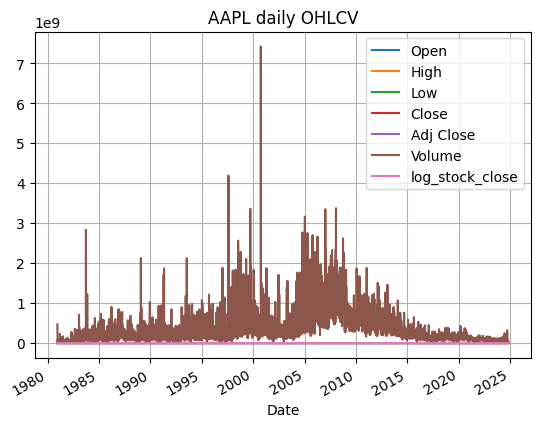

In [68]:
#AAPL_high_low=AAPL.loc[dates_2019,['low','high']]
#print(type(AAPL_high_low))
#Plot the data
AAPL.plot(grid=True,title='AAPL daily OHLCV')

### The scale of the different columns is an issues here, but we can select the columns that we care about to make a cleaner plot

<Axes: title={'center': 'AAPL daily OHLC'}, xlabel='Date'>

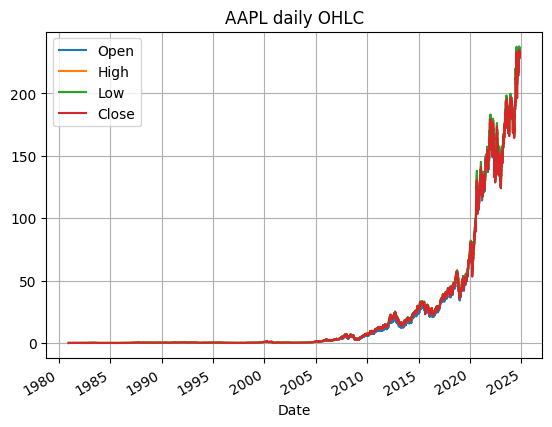

In [69]:
AAPL[["Open","High","Low","Close"]].plot(grid=True,title='AAPL daily OHLC')

###  We will see more on plotting later, but this gives a simple tool to visualize quickly a dataset
---

# Dates and Time slicing

### The python standard library includes ```datetime``` module to handle dates. We can create any date using the method ```datetime.datetime(year,month,day)```

In [79]:
import datetime
import numpy as np
#I strongly recommend to have a look at datetime module as you will be often dealing with this when using time-series data 
date=datetime.datetime(2020, 5, 17)
print(date.year)
print(date.month)
print(date.day)

2020
5
17


### ~~If we want to select a range of dates we can use boolean slicing with datetime objects~~

## **CAUTION:** With numpy 2.X it is no longer possible to comapre datetime objects with  datetime64[ns, UTC]

In [88]:
#Not allowed
AAPL.index>=datetime.datetime(2019, 1, 1)

TypeError: Invalid comparison between dtype=datetime64[ns, UTC] and datetime

## The way to slice by date is using string in the form "YYYY-MM-DD"

In [90]:
dates_2019=AAPL.index[(AAPL.index>="2019-01-01") & (AAPL.index<"2020-01-01")]

<class 'pandas.core.frame.DataFrame'>


<Axes: title={'center': 'AAPL 2019 daily high and low'}, xlabel='Date'>

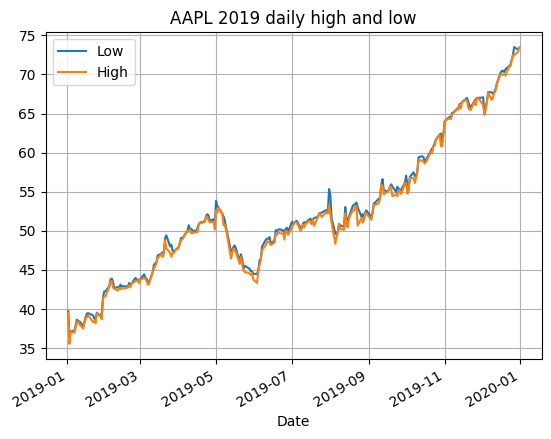

In [91]:
import datetime
# We select just 2019 dates
dates_2019=AAPL.index[(AAPL.index>="2019-01-01") & (AAPL.index<"2020-01-01")]
#We slice the dataframe
AAPL_high_low=AAPL.loc[dates_2019,['Low','High']]
print(type(AAPL_high_low))
#Plot the data
AAPL_high_low.plot(grid=True,title='AAPL 2019 daily high and low')

## **Remark**: The reason why we use datetime objects is because the index is also a datetime object, which is the default index in yfinance. However, if dates are represented as strings, once use string comparison (see below) since dates follow lexicographic ordering, which is the default comparison straegy for strings

In [92]:
date="2022-02-02"

print(date>"2023-02-02")

print(date>"2021-01-01")

False
True


In [93]:
string_index=AAPL.index.astype(str)#cast datetime to string
string_index

Index(['1980-12-12 00:00:00+00:00', '1980-12-15 00:00:00+00:00',
       '1980-12-16 00:00:00+00:00', '1980-12-17 00:00:00+00:00',
       '1980-12-18 00:00:00+00:00', '1980-12-19 00:00:00+00:00',
       '1980-12-22 00:00:00+00:00', '1980-12-23 00:00:00+00:00',
       '1980-12-24 00:00:00+00:00', '1980-12-26 00:00:00+00:00',
       ...
       '2024-10-16 00:00:00+00:00', '2024-10-17 00:00:00+00:00',
       '2024-10-18 00:00:00+00:00', '2024-10-21 00:00:00+00:00',
       '2024-10-22 00:00:00+00:00', '2024-10-23 00:00:00+00:00',
       '2024-10-24 00:00:00+00:00', '2024-10-25 00:00:00+00:00',
       '2024-10-28 00:00:00+00:00', '2024-10-29 00:00:00+00:00'],
      dtype='object', name='Date', length=11062)

In [94]:
string_index>"2023-01-01"# we can use string comparisson

array([False, False, False, ...,  True,  True,  True])

### It doesn't really matter which date representation you use (either python datetime or string), **but be aware of the difference!!!**
---

# Some useful functions for financial applications: Diff, Shift and pct_change()
### ```dataframe.diff(n)``` computes the difference with respect to the tow n postitions below. Shift ```dataframe.shift(n)``` displaces the dataframe $n$ rows down. ```dataframe.pct_change()``` computes returns

In [95]:
AAPL

,Open,High,Low,Close,Adj Close,Volume,log_stock_close
Date,,,,,,,
1980-12-12 00:00:00+00:00,0.000000,0.128348,0.128906,0.128348,0.128348,469033600.0,-2.053010
1980-12-15 00:00:00+00:00,0.093781,0.121652,0.122210,0.121652,0.122210,175884800.0,-2.106591
1980-12-16 00:00:00+00:00,0.086898,0.112723,0.113281,0.112723,0.113281,105728000.0,-2.182822
1980-12-17 00:00:00+00:00,0.089049,0.115513,0.116071,0.115513,0.115513,86441600.0,-2.158372
1980-12-18 00:00:00+00:00,0.091630,0.118862,0.119420,0.118862,0.118862,73449600.0,-2.129792
...,...,...,...,...,...,...,...
2024-10-23 00:00:00+00:00,230.759995,230.759995,235.139999,227.759995,234.080002,52287000.0,5.428292
2024-10-24 00:00:00+00:00,230.570007,230.570007,230.820007,228.410004,229.979996,31109500.0,5.431142
2024-10-25 00:00:00+00:00,231.410004,231.410004,233.220001,229.570007,229.740005,38802300.0,5.436208


In [96]:
AAPL.Close.diff(1)

Date
1980-12-12 00:00:00+00:00         NaN
1980-12-15 00:00:00+00:00   -0.006696
1980-12-16 00:00:00+00:00   -0.008929
1980-12-17 00:00:00+00:00    0.002790
1980-12-18 00:00:00+00:00    0.003349
                               ...   
2024-10-23 00:00:00+00:00   -4.840012
2024-10-24 00:00:00+00:00    0.650009
2024-10-25 00:00:00+00:00    1.160004
2024-10-28 00:00:00+00:00    2.979996
2024-10-29 00:00:00+00:00   -0.229996
Name: Close, Length: 11062, dtype: float64

In [97]:
AAPL.Close.shift(1)

Date
1980-12-12 00:00:00+00:00           NaN
1980-12-15 00:00:00+00:00      0.128348
1980-12-16 00:00:00+00:00      0.121652
1980-12-17 00:00:00+00:00      0.112723
1980-12-18 00:00:00+00:00      0.115513
                                ...    
2024-10-23 00:00:00+00:00    232.600006
2024-10-24 00:00:00+00:00    227.759995
2024-10-25 00:00:00+00:00    228.410004
2024-10-28 00:00:00+00:00    229.570007
2024-10-29 00:00:00+00:00    232.550003
Name: Close, Length: 11062, dtype: float64

In [98]:
AAPL['daily_return'] = AAPL["Close"].pct_change()

In [99]:
AAPL.head()

,Open,High,Low,Close,Adj Close,Volume,log_stock_close,daily_return
Date,,,,,,,,
1980-12-12 00:00:00+00:00,0.000000,0.128348,0.128906,0.128348,0.128348,469033600.0,-2.053010,NaN
1980-12-15 00:00:00+00:00,0.093781,0.121652,0.122210,0.121652,0.122210,175884800.0,-2.106591,-0.052171
1980-12-16 00:00:00+00:00,0.086898,0.112723,0.113281,0.112723,0.113281,105728000.0,-2.182822,-0.073398
1980-12-17 00:00:00+00:00,0.089049,0.115513,0.116071,0.115513,0.115513,86441600.0,-2.158372,0.024751
1980-12-18 00:00:00+00:00,0.091630,0.118862,0.119420,0.118862,0.118862,73449600.0,-2.129792,0.028992


----
# Iterating over Dataframe rows
### Sometime our analysis requires to go row by row in a dataframe to perform a numerical operation. To do this we can use ```iterrows``` or ```itertuples``` . ```iterrows``` returns a (index,row) tuple whereas ```itertuples``` returns a objects whose index attribute gives the index and the rest of the atributes follow the column names

In [100]:
import time
high_low_mid=np.zeros(len(AAPL))
i=0
start_time=time.time()
for index,row in AAPL.iterrows():
    high_low_mid[i]=0.5*(row.High+row.Low)
    i+=1
print("iterrows took", time.time()-start_time,"seconds")

iterrows took 1.2350308895111084 seconds


In [101]:
print(high_low_mid)

[1.28626995e-01 1.21931002e-01 1.13001999e-01 ... 2.32315002e+02
 2.34064995e+02 2.34045006e+02]


In [102]:
high_low_mid=np.zeros(len(AAPL))
index=0
start_time=time.time()
for row in AAPL.itertuples():    
    high_low_mid[index]=0.5*(row.High+row.Low)
    index+=1
print("itertuples took", time.time()-start_time,"seconds")

itertuples took 0.05810999870300293 seconds


In [104]:
print(high_low_mid)

[1.28626995e-01 1.21931002e-01 1.13001999e-01 ... 2.32315002e+02
 2.34064995e+02 2.34045006e+02]


### **Note:** If going row by row is necessary (as we will see in a minute, vectorisation is always preferred), most of the time `itertuples` is much more efficient 
---

# Vectorisation in DataFrame Columns and slices
### As mentioned in the beginning of the session, internally Pandas stores the data as numpy arrays. Hence, we can make use of vectorisation to speed up computations

In [105]:
%timeit high_low_mid=0.5*(AAPL.High+AAPL.Low)

316 μs ± 4.84 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [106]:
high_low_mid=0.5*(AAPL.High+AAPL.Low)
high_low_mid.values

array([1.28626995e-01, 1.21931002e-01, 1.13001999e-01, ...,
       2.32315002e+02, 2.34064995e+02, 2.34045006e+02])

In [107]:
#We can apply the same pinciple if we want a slice corresponding to 2019 data

dates_2019=AAPL.index[(AAPL.index>="2019-01-01") & (AAPL.index<"2020-01-01")]

%timeit high_low_mid_2019=0.5*(AAPL.High[dates_2019]+AAPL.Low[dates_2019])# gives some performance improvement

%timeit high_low_mid_2019=0.5*(AAPL.loc[dates_2019,'High']+AAPL.loc[dates_2019,'Low'])



1.69 ms ± 41.2 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
1.75 ms ± 41 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


---
# Complex functions and  ```apply```
### Using ```dataframe.apply``` we can vectorise any user-defined function that supports vectorisation and apply it indexwise (axis=1) or columnwise (axis=0). One can further optimize the method by setting ```raw=False``` which will make assume objects to be numpy arrays internally

In [108]:
AAPL=AAPL.loc[:,['Open','High','Low','Close']]

In [109]:
# Columnwuse
def my_func(x):
    # Function will be applied columnwise x represents the entire column
    return x.max() -x.min() 

%timeit AAPL.apply(my_func,axis=0,raw=False)
%timeit AAPL.apply(my_func,axis=0,raw=True)

AAPL.apply(my_func,axis=0,raw=False)# For each column do maximum -minimum value
    

1.41 ms ± 14.2 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
328 μs ± 8.78 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


Open     236.479996
High     236.430889
Low      237.440340
Close    234.400890
dtype: float64

In [110]:
def my_func_high_low_mid(x):
    
     # Function will be applied rowise, x the entire 
    return 0.5*(x.High+x.Low) #here we assume x mantains the column structure

def my_func_high_low_mid2(x):
    # Function will be applied rowise, x the entire row casted to numpy array
    return 0.5*(x[1]+x[2]) # We need to use integer slicing

%timeit AAPL.apply(my_func_high_low_mid,axis=1,raw=False)
%timeit AAPL.apply(my_func_high_low_mid2,axis=1,raw=True)

406 ms ± 50.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
62.8 ms ± 583 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [111]:
AAPL.apply(my_func_high_low_mid2,axis=1,raw=True)

Date
1980-12-12 00:00:00+00:00      0.128627
1980-12-15 00:00:00+00:00      0.121931
1980-12-16 00:00:00+00:00      0.113002
1980-12-17 00:00:00+00:00      0.115792
1980-12-18 00:00:00+00:00      0.119141
                                ...    
2024-10-23 00:00:00+00:00    232.949997
2024-10-24 00:00:00+00:00    230.695007
2024-10-25 00:00:00+00:00    232.315002
2024-10-28 00:00:00+00:00    234.064995
2024-10-29 00:00:00+00:00    234.045006
Length: 11062, dtype: float64

### As you can see ```raw=False``` can give dramatic performance improvements as data will be treated as a numpy array

# Rolling windows

### In time-series it is useful to apply a function on observation windows of size $n$. We can do so using ```dataframe.rolling(n)```. The this is followed by the function we want to apply to each rolling window; tipycal choices are ```mean,std,min,max```. For more details and additional arguments see (https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rolling.html)


In [112]:
# Lets compute the 10 day moving average
AAPL.Close.rolling(10).mean()

Date
1980-12-12 00:00:00+00:00           NaN
1980-12-15 00:00:00+00:00           NaN
1980-12-16 00:00:00+00:00           NaN
1980-12-17 00:00:00+00:00           NaN
1980-12-18 00:00:00+00:00           NaN
                                ...    
2024-10-23 00:00:00+00:00    230.465999
2024-10-24 00:00:00+00:00    230.589999
2024-10-25 00:00:00+00:00    230.813000
2024-10-28 00:00:00+00:00    231.208000
2024-10-29 00:00:00+00:00    231.203001
Name: Close, Length: 11062, dtype: float64

In [113]:
# Lets compute the 10 day rolling minimum
AAPL.Close.rolling(10).min()

Date
1980-12-12 00:00:00+00:00           NaN
1980-12-15 00:00:00+00:00           NaN
1980-12-16 00:00:00+00:00           NaN
1980-12-17 00:00:00+00:00           NaN
1980-12-18 00:00:00+00:00           NaN
                                ...    
2024-10-23 00:00:00+00:00    227.169998
2024-10-24 00:00:00+00:00    227.339996
2024-10-25 00:00:00+00:00    227.759995
2024-10-28 00:00:00+00:00    227.759995
2024-10-29 00:00:00+00:00    227.759995
Name: Close, Length: 11062, dtype: float64

In [114]:
# Lets compute the 10 day rolling std
AAPL.Close.rolling(10).std()

Date
1980-12-12 00:00:00+00:00         NaN
1980-12-15 00:00:00+00:00         NaN
1980-12-16 00:00:00+00:00         NaN
1980-12-17 00:00:00+00:00         NaN
1980-12-18 00:00:00+00:00         NaN
                               ...   
2024-10-23 00:00:00+00:00    2.757737
2024-10-24 00:00:00+00:00    2.617373
2024-10-25 00:00:00+00:00    2.395281
2024-10-28 00:00:00+00:00    2.314109
2024-10-29 00:00:00+00:00    2.311373
Name: Close, Length: 11062, dtype: float64

# Join/Merge/Concatenate dataframes and series

## 1 Join and Merge

### Now that we have a clear view on basic data manipulation, we can ask ourselves how can we merge data from different Stocks?

In [115]:
list_of_symbols=['aapl','amzn','dis','msft','spy']

dict_of_df={}
for symbol in list_of_symbols:
    aux=yfinance.download(symbol) 
    dict_of_df[symbol]=pd.DataFrame(aux.values,aux.index,columns=['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'])



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [116]:
dict_of_df['amzn']

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1997-05-15 00:00:00+00:00,0.097917,0.097917,0.125000,0.096354,0.121875,1.443120e+09
1997-05-16 00:00:00+00:00,0.086458,0.086458,0.098958,0.085417,0.098438,2.940000e+08
1997-05-19 00:00:00+00:00,0.085417,0.085417,0.088542,0.081250,0.088021,1.221360e+08
1997-05-20 00:00:00+00:00,0.081771,0.081771,0.087500,0.081771,0.086458,1.093440e+08
1997-05-21 00:00:00+00:00,0.071354,0.071354,0.082292,0.068750,0.081771,3.770640e+08
...,...,...,...,...,...,...
2024-10-23 00:00:00+00:00,184.710007,184.710007,189.160004,183.690002,188.850006,3.193710e+07
2024-10-24 00:00:00+00:00,186.380005,186.380005,187.110001,183.860001,185.250000,2.164740e+07
2024-10-25 00:00:00+00:00,187.830002,187.830002,190.449997,187.529999,187.850006,2.936210e+07


In [117]:
dict_of_df['aapl']

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12 00:00:00+00:00,0.098943,0.128348,0.128906,0.128348,0.128348,469033600.0
1980-12-15 00:00:00+00:00,0.093781,0.121652,0.122210,0.121652,0.122210,175884800.0
1980-12-16 00:00:00+00:00,0.086898,0.112723,0.113281,0.112723,0.113281,105728000.0
1980-12-17 00:00:00+00:00,0.089049,0.115513,0.116071,0.115513,0.115513,86441600.0
1980-12-18 00:00:00+00:00,0.091630,0.118862,0.119420,0.118862,0.118862,73449600.0
...,...,...,...,...,...,...
2024-10-23 00:00:00+00:00,230.759995,230.759995,235.139999,227.759995,234.080002,52287000.0
2024-10-24 00:00:00+00:00,230.570007,230.570007,230.820007,228.410004,229.979996,31109500.0
2024-10-25 00:00:00+00:00,231.410004,231.410004,233.220001,229.570007,229.740005,38802300.0


### We can merge two dataframes by index using ```merge```. By setting ```how='inner'``` we make sure that only intersecting indices will be selected and likewise setting ```left_index=True```, ```right_index=True``` we make sure that both indices are being considered 

In [119]:
%timeit merged_df1=dict_of_df['aapl'].merge(dict_of_df['amzn'],how='inner',left_index=True, right_index=True,suffixes=('_aapl','_amzn'))

2.07 ms ± 133 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [118]:
merged_df1=dict_of_df['aapl'].merge(dict_of_df['amzn'],how='inner',left_index=True, right_index=True,suffixes=('_aapl','_amzn'))
merged_df1.head()

,Open_aapl,High_aapl,Low_aapl,Close_aapl,Adj Close_aapl,Volume_aapl,Open_amzn,High_amzn,Low_amzn,Close_amzn,Adj Close_amzn,Volume_amzn
Date,,,,,,,,,,,,
1997-05-15 00:00:00+00:00,0.133834,0.158482,0.160714,0.156250,0.158482,99008000.0,0.097917,0.097917,0.125000,0.096354,0.121875,1.443120e+09
1997-05-16 00:00:00+00:00,0.130064,0.154018,0.157366,0.154018,0.156250,93296000.0,0.086458,0.086458,0.098958,0.085417,0.098438,2.940000e+08
1997-05-19 00:00:00+00:00,0.128180,0.151786,0.157366,0.151786,0.156250,52259200.0,0.085417,0.085417,0.088542,0.081250,0.088021,1.221360e+08
1997-05-20 00:00:00+00:00,0.130064,0.154018,0.155692,0.149554,0.151786,84828800.0,0.081771,0.081771,0.087500,0.081771,0.086458,1.093440e+08
1997-05-21 00:00:00+00:00,0.127237,0.150670,0.152902,0.147321,0.152902,122248000.0,0.071354,0.071354,0.082292,0.068750,0.081771,3.770640e+08


### Likewise we can perform the same operation using  ```join```

In [120]:
%timeit merged_df2=dict_of_df['aapl'].join(dict_of_df['amzn'],how='inner',lsuffix='_aapl',rsuffix='_amzn')

2.08 ms ± 67.9 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [121]:
merged_df2=dict_of_df['aapl'].join(dict_of_df['amzn'],how='inner',lsuffix='_aapl',rsuffix='_amz')
merged_df2.head()

,Open_aapl,High_aapl,Low_aapl,Close_aapl,Adj Close_aapl,Volume_aapl,Open_amz,High_amz,Low_amz,Close_amz,Adj Close_amz,Volume_amz
Date,,,,,,,,,,,,
1997-05-15 00:00:00+00:00,0.133834,0.158482,0.160714,0.156250,0.158482,99008000.0,0.097917,0.097917,0.125000,0.096354,0.121875,1.443120e+09
1997-05-16 00:00:00+00:00,0.130064,0.154018,0.157366,0.154018,0.156250,93296000.0,0.086458,0.086458,0.098958,0.085417,0.098438,2.940000e+08
1997-05-19 00:00:00+00:00,0.128180,0.151786,0.157366,0.151786,0.156250,52259200.0,0.085417,0.085417,0.088542,0.081250,0.088021,1.221360e+08
1997-05-20 00:00:00+00:00,0.130064,0.154018,0.155692,0.149554,0.151786,84828800.0,0.081771,0.081771,0.087500,0.081771,0.086458,1.093440e+08
1997-05-21 00:00:00+00:00,0.127237,0.150670,0.152902,0.147321,0.152902,122248000.0,0.071354,0.071354,0.082292,0.068750,0.081771,3.770640e+08


### ***Remark***: the difference between ```merge``` and ```join``` is that ```merge``` allows for more flexibility allowing to merge by column values as well. In general, merge performance tends to be better at the cost of providing more arguments

## 2. Adding rows to an existing dataframe
### ```pd.concat``` allows to add additional rows to an existing dataframe

In [122]:
dataframe=pd.DataFrame({"Open": 100,"High": 100,"Low": 100,"Close": 100 },index=[0])
print(dataframe)
AAPL=pd.concat([AAPL,dataframe],ignore_index=True)

   Open  High  Low  Close
0   100   100  100    100


In [123]:
AAPL

,Open,High,Low,Close
0,0.000000,0.128348,0.128906,0.128348
1,0.093781,0.121652,0.122210,0.121652
2,0.086898,0.112723,0.113281,0.112723
3,0.089049,0.115513,0.116071,0.115513
4,0.091630,0.118862,0.119420,0.118862
...,...,...,...,...
11058,230.570007,230.570007,230.820007,228.410004
11059,231.410004,231.410004,233.220001,229.570007
11060,233.399994,233.399994,234.729996,232.550003
11061,233.880005,233.880005,234.210007,232.320007


In [124]:
pd.concat([dict_of_df['aapl'],dict_of_df['amzn']])

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12 00:00:00+00:00,0.098943,0.128348,0.128906,0.128348,0.128348,469033600.0
1980-12-15 00:00:00+00:00,0.093781,0.121652,0.122210,0.121652,0.122210,175884800.0
1980-12-16 00:00:00+00:00,0.086898,0.112723,0.113281,0.112723,0.113281,105728000.0
1980-12-17 00:00:00+00:00,0.089049,0.115513,0.116071,0.115513,0.115513,86441600.0
1980-12-18 00:00:00+00:00,0.091630,0.118862,0.119420,0.118862,0.118862,73449600.0
...,...,...,...,...,...,...
2024-10-23 00:00:00+00:00,184.710007,184.710007,189.160004,183.690002,188.850006,31937100.0
2024-10-24 00:00:00+00:00,186.380005,186.380005,187.110001,183.860001,185.250000,21647400.0
2024-10-25 00:00:00+00:00,187.830002,187.830002,190.449997,187.529999,187.850006,29362100.0


## 3. Concat dictionaries and Multi_indexing
### Concatenate allows to merge multiple df at once, but will create a multi-index/multi-column data frame

In [125]:
df1=pd.concat(dict_of_df,axis=1)
df1

aapl                                      \
                                 Open        High         Low       Close   
Date                                                                        
1962-01-02 00:00:00+00:00         NaN         NaN         NaN         NaN   
1962-01-03 00:00:00+00:00         NaN         NaN         NaN         NaN   
1962-01-04 00:00:00+00:00         NaN         NaN         NaN         NaN   
1962-01-05 00:00:00+00:00         NaN         NaN         NaN         NaN   
1962-01-08 00:00:00+00:00         NaN         NaN         NaN         NaN   
...                               ...         ...         ...         ...   
2024-10-23 00:00:00+00:00  230.759995  230.759995  235.139999  227.759995   
2024-10-24 00:00:00+00:00  230.570007  230.570007  230.820007  228.410004   
2024-10-25 00:00:00+00:00  231.410004  231.410004  233.220001  229.570007   
2024-10-28 00:00:00+00:00  233.399994  233.399994  234.729996  232.550003   
2024-10-29 00:00:00+00:00  233.910004  233.910004  234.210007  232.320007   

                                                         amzn              \
                            Adj Close      Volume        Open        High   
Date                                                                        
1962-01-02 00:00:00+00:00         NaN         NaN         NaN         NaN   
1962-01-03 00:00:00+00:00         NaN         NaN         NaN         NaN   
1962-01-04 00:00:00+00:00         NaN         NaN         NaN         NaN   
1962-01-05 00:00:00+00:00         NaN         NaN         NaN         NaN   
1962-01-08 00:00:00+00:00         NaN         NaN         NaN         NaN   
...                               ...         ...         ...         ...   
2024-10-23 00:00:00+00:00  234.080002  52287000.0  184.710007  184.710007   
2024-10-24 00:00:00+00:00  229.979996  31109500.0  186.380005  186.380005   
2024-10-25 00:00:00+00:00  229.740005  38802300.0  187.830002  187.830002   
2024-10-28 00:00:00+00:00  233.320007  36028800.0  188.389999  188.389999   
2024-10-29 00:00:00+00:00  233.195007  14984510.0  190.600006  190.600006   

                                                   ...        msft  \
                                  Low       Close  ...         Low   
Date                                               ...               
1962-01-02 00:00:00+00:00         NaN         NaN  ...         NaN   
1962-01-03 00:00:00+00:00         NaN         NaN  ...         NaN   
1962-01-04 00:00:00+00:00         NaN         NaN  ...         NaN   
1962-01-05 00:00:00+00:00         NaN         NaN  ...         NaN   
1962-01-08 00:00:00+00:00         NaN         NaN  ...         NaN   
...                               ...         ...  ...         ...   
2024-10-23 00:00:00+00:00  189.160004  183.690002  ...  431.079987   
2024-10-24 00:00:00+00:00  187.110001  183.860001  ...  425.980011   
2024-10-25 00:00:00+00:00  190.449997  187.529999  ...  432.519989   
2024-10-28 00:00:00+00:00  190.210007  188.210007  ...  431.940002   
2024-10-29 00:00:00+00:00  190.880005  187.815002  ...  432.209991   

                                                                      spy  \
                                Close   Adj Close      Volume        Open   
Date                                                                        
1962-01-02 00:00:00+00:00         NaN         NaN         NaN         NaN   
1962-01-03 00:00:00+00:00         NaN         NaN         NaN         NaN   
1962-01-04 00:00:00+00:00         NaN         NaN         NaN         NaN   
1962-01-05 00:00:00+00:00         NaN         NaN         NaN         NaN   
1962-01-08 00:00:00+00:00         NaN         NaN         NaN         NaN   
...                               ...         ...         ...         ...   
2024-10-23 00:00:00+00:00  422.529999  430.859985  19654400.0  577.989990   
2024-10-24 00:00:00+00:00  422.399994  425.329987  13581600.0  579.239990   
2024-10-25 00:00:00+00:00  426.570007  426.7600

In [126]:
df2=pd.concat(dict_of_df,axis=0)
df2

Open        High         Low  \
     Date                                                            
aapl 1980-12-12 00:00:00+00:00    0.098943    0.128348    0.128906   
     1980-12-15 00:00:00+00:00    0.093781    0.121652    0.122210   
     1980-12-16 00:00:00+00:00    0.086898    0.112723    0.113281   
     1980-12-17 00:00:00+00:00    0.089049    0.115513    0.116071   
     1980-12-18 00:00:00+00:00    0.091630    0.118862    0.119420   
...                                    ...         ...         ...   
spy  2024-10-23 00:00:00+00:00  577.989990  577.989990  581.710022   
     2024-10-24 00:00:00+00:00  579.239990  579.239990  580.059998   
     2024-10-25 00:00:00+00:00  579.039978  579.039978  584.460022   
     2024-10-28 00:00:00+00:00  580.830017  580.830017  582.710022   
     2024-10-29 00:00:00+00:00  581.784973  581.784973  582.765015   

                                     Close   Adj Close       Volume  
     Date                                                            
aapl 1980-12-12 00:00:00+00:00    0.128348    0.128348  469033600.0  
     1980-12-15 00:00:00+00:00    0.121652    0.122210  175884800.0  
     1980-12-16 00:00:00+00:00    0.112723    0.113281  105728000.0  
     1980-12-17 00:00:00+00:00    0.115513    0.115513   86441600.0  
     1980-12-18 00:00:00+00:00    0.118862    0.118862   73449600.0  
...                                    ...         ...          ...  
spy  2024-10-23 00:00:00+00:00  574.419983  581.260010   49314600.0  
     2024-10-24 00:00:00+00:00  576.570007  579.979980   34979900.0  
     2024-10-25 00:00:00+00:00  578.080017  581.510010   47268200.0  
     2024-10-28 00:00:00+00:00  580.520020  582.580017   30141800.0  
     2024-10-29 00:00:00+00:00  578.429993  579.849976   21989812.0  

[51518 rows x 6 columns]

### This introduces multi_indexing e.g. indices or columns that are 2D arrays or in general n dimensional arrays

In [127]:
df1.columns

MultiIndex([('aapl',      'Open'),
            ('aapl',      'High'),
            ('aapl',       'Low'),
            ('aapl',     'Close'),
            ('aapl', 'Adj Close'),
            ('aapl',    'Volume'),
            ('amzn',      'Open'),
            ('amzn',      'High'),
            ('amzn',       'Low'),
            ('amzn',     'Close'),
            ('amzn', 'Adj Close'),
            ('amzn',    'Volume'),
            ( 'dis',      'Open'),
            ( 'dis',      'High'),
            ( 'dis',       'Low'),
            ( 'dis',     'Close'),
            ( 'dis', 'Adj Close'),
            ( 'dis',    'Volume'),
            ('msft',      'Open'),
            ('msft',      'High'),
            ('msft',       'Low'),
            ('msft',     'Close'),
            ('msft', 'Adj Close'),
            ('msft',    'Volume'),
            ( 'spy',      'Open'),
            ( 'spy',      'High'),
            ( 'spy',       'Low'),
            ( 'spy',     'Close'),
            ( 'spy',

### The good news is that we can efficiently use slicing with  ```loc```, see examples below

In [128]:
df1.loc[:,('msft','Close')]#retrieve all rows for msft and close

Date
1962-01-02 00:00:00+00:00           NaN
1962-01-03 00:00:00+00:00           NaN
1962-01-04 00:00:00+00:00           NaN
1962-01-05 00:00:00+00:00           NaN
1962-01-08 00:00:00+00:00           NaN
                                ...    
2024-10-23 00:00:00+00:00    422.529999
2024-10-24 00:00:00+00:00    422.399994
2024-10-25 00:00:00+00:00    426.570007
2024-10-28 00:00:00+00:00    426.299988
2024-10-29 00:00:00+00:00    425.800110
Name: (msft, Close), Length: 15815, dtype: float64

In [129]:
df1.loc[:,('msft')]#retrieve all rows and columns for msft and close

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1962-01-02 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-03 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-04 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-05 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-08 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2024-10-23 00:00:00+00:00,424.600006,424.600006,431.079987,422.529999,430.859985,19654400.0
2024-10-24 00:00:00+00:00,424.730011,424.730011,425.980011,422.399994,425.329987,13581600.0
2024-10-25 00:00:00+00:00,428.149994,428.149994,432.519989,426.570007,426.760010,16899100.0


### If we want to select all elements at a given index level, we can use ```slice(None)``` at that level instead of the more intuitive ```:``` that we are used to

In [130]:
df1.loc[:,(slice(None),"Close")]

,aapl,amzn,dis,msft,spy
,Close,Close,Close,Close,Close
Date,,,,,
1962-01-02 00:00:00+00:00,NaN,NaN,0.092908,NaN,NaN
1962-01-03 00:00:00+00:00,NaN,NaN,0.092908,NaN,NaN
1962-01-04 00:00:00+00:00,NaN,NaN,0.093532,NaN,NaN
1962-01-05 00:00:00+00:00,NaN,NaN,0.093844,NaN,NaN
1962-01-08 00:00:00+00:00,NaN,NaN,0.092285,NaN,NaN
...,...,...,...,...,...
2024-10-23 00:00:00+00:00,227.759995,183.690002,95.989998,422.529999,574.419983
2024-10-24 00:00:00+00:00,228.410004,183.860001,95.250000,422.399994,576.570007


### This way we can nicely obtain all close time series for many symbols

In [131]:
df2.index

MultiIndex([('aapl', '1980-12-12 00:00:00+00:00'),
            ('aapl', '1980-12-15 00:00:00+00:00'),
            ('aapl', '1980-12-16 00:00:00+00:00'),
            ('aapl', '1980-12-17 00:00:00+00:00'),
            ('aapl', '1980-12-18 00:00:00+00:00'),
            ('aapl', '1980-12-19 00:00:00+00:00'),
            ('aapl', '1980-12-22 00:00:00+00:00'),
            ('aapl', '1980-12-23 00:00:00+00:00'),
            ('aapl', '1980-12-24 00:00:00+00:00'),
            ('aapl', '1980-12-26 00:00:00+00:00'),
            ...
            ( 'spy', '2024-10-16 00:00:00+00:00'),
            ( 'spy', '2024-10-17 00:00:00+00:00'),
            ( 'spy', '2024-10-18 00:00:00+00:00'),
            ( 'spy', '2024-10-21 00:00:00+00:00'),
            ( 'spy', '2024-10-22 00:00:00+00:00'),
            ( 'spy', '2024-10-23 00:00:00+00:00'),
            ( 'spy', '2024-10-24 00:00:00+00:00'),
            ( 'spy', '2024-10-25 00:00:00+00:00'),
            ( 'spy', '2024-10-28 00:00:00+00:00'),
            ( '

In [132]:
df2.loc[('aapl'),:]### retrieve all columns for aapl

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12 00:00:00+00:00,0.098943,0.128348,0.128906,0.128348,0.128348,469033600.0
1980-12-15 00:00:00+00:00,0.093781,0.121652,0.122210,0.121652,0.122210,175884800.0
1980-12-16 00:00:00+00:00,0.086898,0.112723,0.113281,0.112723,0.113281,105728000.0
1980-12-17 00:00:00+00:00,0.089049,0.115513,0.116071,0.115513,0.115513,86441600.0
1980-12-18 00:00:00+00:00,0.091630,0.118862,0.119420,0.118862,0.118862,73449600.0
...,...,...,...,...,...,...
2024-10-23 00:00:00+00:00,230.759995,230.759995,235.139999,227.759995,234.080002,52287000.0
2024-10-24 00:00:00+00:00,230.570007,230.570007,230.820007,228.410004,229.979996,31109500.0
2024-10-25 00:00:00+00:00,231.410004,231.410004,233.220001,229.570007,229.740005,38802300.0


---
# Creating a Multi-Index and performing Groupby operations


### Groupby allows to index data using different columns or compute summary statistics for groups wihin the data. Let's look at some option data


In [133]:
import numpy as np
import pandas as pd

In [134]:
option_data=pd.read_csv('AMZN_options.csv')
option_data

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency,expiration_date,option_type
0,AMZN201106C01820000,2020-11-02 18:28:21,1820.0,1148.70,1139.35,1143.20,-62.51001,-5.160956,15.0,4.0,0.000010,True,REGULAR,USD,2020-11-06,C
1,AMZN201106C01830000,2020-11-02 18:28:21,1830.0,1146.25,1123.35,1127.75,-56.18994,-4.672994,1.0,2.0,0.000010,True,REGULAR,USD,2020-11-06,C
2,AMZN201106C01840000,2020-11-02 18:28:21,1840.0,1128.45,1116.55,1120.70,-62.75000,-5.267798,1.0,2.0,0.000010,True,REGULAR,USD,2020-11-06,C
3,AMZN201106C01850000,2020-11-02 18:28:21,1850.0,1126.00,1108.85,1112.60,-56.47998,-4.776401,1.0,3.0,0.000010,True,REGULAR,USD,2020-11-06,C
4,AMZN201106C01870000,2020-11-02 14:34:36,1870.0,1201.10,1086.10,1092.25,-17.23999,-1.415039,2.0,2.0,0.000010,True,REGULAR,USD,2020-11-06,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6032,AMZN230120P03600000,2020-10-28 16:43:01,3600.0,980.00,1061.70,1078.45,0.00000,0.000000,1.0,2.0,0.375985,True,REGULAR,USD,2023-01-20,P
6033,AMZN230120P03900000,2020-09-30 15:21:16,3900.0,1166.30,1227.55,1245.00,0.00000,0.000000,1.0,0.0,0.340918,True,REGULAR,USD,2023-01-20,P
6034,AMZN230120P04000000,2020-10-21 13:47:58,4000.0,1247.25,1359.95,1376.50,0.00000,0.000000,55.0,59.0,0.371846,True,REGULAR,USD,2023-01-20,P
6035,AMZN230120P04800000,2020-10-14 19:58:31,4800.0,1795.00,2017.40,2033.00,0.00000,0.000000,5.0,4.0,0.363714,True,REGULAR,USD,2023-01-20,P


### This dataframe contains multiple option data. As you may already now each option is uniquely defined by "expiration_date" and "option_type". We can create a custom multi-index in our dataframe by using the ```dataframe.set_index(["column1","column2",...])```

In [135]:
indexed_option_data=option_data.set_index(["expiration_date","option_type"])
indexed_option_data

contractSymbol        lastTradeDate  strike  \
expiration_date option_type                                                     
2020-11-06      C            AMZN201106C01820000  2020-11-02 18:28:21  1820.0   
                C            AMZN201106C01830000  2020-11-02 18:28:21  1830.0   
                C            AMZN201106C01840000  2020-11-02 18:28:21  1840.0   
                C            AMZN201106C01850000  2020-11-02 18:28:21  1850.0   
                C            AMZN201106C01870000  2020-11-02 14:34:36  1870.0   
...                                          ...                  ...     ...   
2023-01-20      P            AMZN230120P03600000  2020-10-28 16:43:01  3600.0   
                P            AMZN230120P03900000  2020-09-30 15:21:16  3900.0   
                P            AMZN230120P04000000  2020-10-21 13:47:58  4000.0   
                P            AMZN230120P04800000  2020-10-14 19:58:31  4800.0   
                P            AMZN230120P05000000  2020-10-22 18:55:34  5000.0   

                             lastPrice      bid      ask    change  \
expiration_date option_type                                          
2020-11-06      C              1148.70  1139.35  1143.20 -62.51001   
                C              1146.25  1123.35  1127.75 -56.18994   
                C              1128.45  1116.55  1120.70 -62.75000   
                C              1126.00  1108.85  1112.60 -56.47998   
                C              1201.10  1086.10  1092.25 -17.23999   
...                                ...      ...      ...       ...   
2023-01-20      P               980.00  1061.70  1078.45   0.00000   
                P              1166.30  1227.55  1245.00   0.00000   
                P              1247.25  1359.95  1376.50   0.00000   
                P              1795.00  2017.40  2033.00   0.00000   
                P              2051.20  2193.50  2203.00   0.00000   

                             percentChange  volume  openInterest  \
expiration_date option_type                                        
2020-11-06      C                -5.160956    15.0           4.0   
                C                -4.672994     1.0           2.0   
                C                -5.267798     1.0           2.0   
                C                -4.776401     1.0           3.0   
                C                -1.415039     2.0           2.0   
...                                    ...     ...           ...   
2023-01-20      P                 0.000000     1.0           2.0   
                P                 0.000000     1.0           0.0   
                P                 0.000000    55.0          59.0   
                P                 0.000000     5.0           4.0   
                P                 0.000000     1.0           1.0   

                             impliedVolatility  inTheMoney contractSize  \
expiration_date option_type                                               
2020-11-06      C                     0.000010        True      REGULAR   
                C                     0.000010        True      REGULAR   
                C                     0.000010        True      REGULAR   
                C                     0.000010        True      REGULAR   
                C                     0.000010        True      REGULAR   
...                                        ...         ...          ...   
2023-01-20      P                     0.375985        True      REGULAR   
                P                     0.340918        True      REGULAR   
                P                     0.371846        True      REGULAR   
                P                     0.363714        True      REGULAR   
                P                     0.358921        True      REGULAR   

                            currency  
expiration_date option_type           
2020-11-06      C                USD  
                C                USD  
                C                USD  
             

In [136]:
indexed_option_data.loc[("2020-11-06",),:]##retrieve all options for a given expiration

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
option_type,,,,,,,,,,,,,,
C,AMZN201106C01820000,2020-11-02 18:28:21,1820.0,1148.70,1139.35,1143.20,-62.51001,-5.160956,15.0,4.0,0.000010,True,REGULAR,USD
C,AMZN201106C01830000,2020-11-02 18:28:21,1830.0,1146.25,1123.35,1127.75,-56.18994,-4.672994,1.0,2.0,0.000010,True,REGULAR,USD
C,AMZN201106C01840000,2020-11-02 18:28:21,1840.0,1128.45,1116.55,1120.70,-62.75000,-5.267798,1.0,2.0,0.000010,True,REGULAR,USD
C,AMZN201106C01850000,2020-11-02 18:28:21,1850.0,1126.00,1108.85,1112.60,-56.47998,-4.776401,1.0,3.0,0.000010,True,REGULAR,USD
C,AMZN201106C01870000,2020-11-02 14:34:36,1870.0,1201.10,1086.10,1092.25,-17.23999,-1.415039,2.0,2.0,0.000010,True,REGULAR,USD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P,AMZN201106P04550000,2020-11-02 15:27:12,4550.0,1540.00,1587.50,1591.95,246.44995,19.052217,1.0,1.0,2.030950,True,REGULAR,USD
P,AMZN201106P04650000,2020-10-30 15:11:44,4650.0,1565.65,1686.55,1691.95,0.00000,0.000000,1.0,0.0,2.097234,True,REGULAR,USD
P,AMZN201106P04700000,2020-10-30 17:11:39,4700.0,1661.40,1737.35,1742.15,0.00000,0.000000,4.0,2.0,2.151738,True,REGULAR,USD


In [137]:
indexed_option_data.loc[("2020-11-06","C"),:]#retrieve all Call options for a given expiration

contractSymbol        lastTradeDate  strike  \
expiration_date option_type                                                     
2020-11-06      C            AMZN201106C01820000  2020-11-02 18:28:21  1820.0   
                C            AMZN201106C01830000  2020-11-02 18:28:21  1830.0   
                C            AMZN201106C01840000  2020-11-02 18:28:21  1840.0   
                C            AMZN201106C01850000  2020-11-02 18:28:21  1850.0   
                C            AMZN201106C01870000  2020-11-02 14:34:36  1870.0   
...                                          ...                  ...     ...   
                C            AMZN201106C04650000  2020-11-02 15:54:50  4650.0   
                C            AMZN201106C04700000  2020-10-30 19:55:10  4700.0   
                C            AMZN201106C04750000  2020-11-02 17:32:06  4750.0   
                C            AMZN201106C04800000  2020-10-30 18:56:49  4800.0   
                C            AMZN201106C04850000  2020-11-02 19:06:05  4850.0   

                             lastPrice      bid      ask    change  \
expiration_date option_type                                          
2020-11-06      C              1148.70  1139.35  1143.20 -62.51001   
                C              1146.25  1123.35  1127.75 -56.18994   
                C              1128.45  1116.55  1120.70 -62.75000   
                C              1126.00  1108.85  1112.60 -56.47998   
                C              1201.10  1086.10  1092.25 -17.23999   
...                                ...      ...      ...       ...   
                C                 0.01     0.00     0.08   0.00000   
                C                 0.04     0.00     0.03   0.00000   
                C                 0.01     0.00     0.04  -0.04000   
                C                 0.01     0.00     0.01  -0.04000   
                C                 0.01     0.00     0.01  -0.02000   

                             percentChange  volume  openInterest  \
expiration_date option_type                                        
2020-11-06      C                -5.160956    15.0           4.0   
                C                -4.672994     1.0           2.0   
                C                -5.267798     1.0           2.0   
                C                -4.776401     1.0           3.0   
                C                -1.415039     2.0           2.0   
...                                    ...     ...           ...   
                C                 0.000000     2.0         239.0   
                C                 0.000000    64.0         121.0   
                C               -79.999990     6.0          73.0   
                C               -79.999990     2.0         229.0   
                C               -66.666670   398.0         433.0   

                             impliedVolatility  inTheMoney contractSize  \
expiration_date option_type                                               
2020-11-06      C                     0.000010        True      REGULAR   
                C                     0.000010        True      REGULAR   
                C                     0.000010        True      REGULAR   
                C                     0.000010        True      REGULAR   
                C                     0.000010        True      REGULAR   
...                                        ...         ...          ...   
                C                     1.121098       False      REGULAR   
                C                     1.070317       False      REGULAR   
                C                     1.117192       False      REGULAR   
                C                     1.046880       False      REGULAR   
                C                     1.062505       False      REGULAR   

                            currency  
expiration_date option_type           
2020-11-06      C                USD  
                C                USD  
                C                USD  
             

### We can use the ```groupby``` method to apply a function such as mean,std,min,max to our data grouped in a particular way ```dataframe.groupby([column1,column2,...]).function()```, where the function operations are applied columnwise

### Note that groupby tipically returns a multi-index dataframe

In [138]:
option_data.groupby(["expiration_date","option_type"]).max() #gives the maximum value for each expiration/option_type combination

contractSymbol        lastTradeDate  strike  \
expiration_date option_type                                                     
2020-11-06      C            AMZN201106C04850000  2020-11-02 19:11:10  4850.0   
                P            AMZN201106P04850000  2020-11-02 19:11:17  4850.0   
2020-11-13      C            AMZN201113C04850000  2020-11-02 19:11:10  4850.0   
                P            AMZN201113P04650000  2020-11-02 19:11:15  4650.0   
2020-11-20      C            AMZN201120C05300000  2020-11-02 19:10:24  5300.0   
                P            AMZN201120P05300000  2020-11-02 19:10:56  5300.0   
2020-11-27      C            AMZN201127C04850000  2020-11-02 19:10:50  4850.0   
                P            AMZN201127P04550000  2020-11-02 19:10:56  4550.0   
2020-12-04      C            AMZN201204C03800000  2020-11-02 19:09:31  3800.0   
                P            AMZN201204P03440000  2020-11-02 19:06:10  3440.0   
2020-12-11      C            AMZN201211C03300000  2020-11-02 19:06:56  3300.0   
                P            AMZN201211P03300000  2020-11-02 19:06:01  3300.0   
2020-12-18      C            AMZN201218C05300000  2020-11-02 19:09:59  5300.0   
                P            AMZN201218P05300000  2020-11-02 19:10:15  5300.0   
2021-01-15      C            AMZN210115C05300000  2020-11-02 19:09:43  5300.0   
                P            AMZN210115P05300000  2020-11-02 19:09:28  5300.0   
2021-02-19      C            AMZN210219C05300000  2020-11-02 19:09:55  5300.0   
                P            AMZN210219P05000000  2020-11-02 19:09:25  5000.0   
2021-03-19      C            AMZN210319C05300000  2020-11-02 19:07:23  5300.0   
                P            AMZN210319P05200000  2020-11-02 19:10:45  5200.0   
2021-04-16      C            AMZN210416C05300000  2020-11-02 18:59:31  5300.0   
                P            AMZN210416P05300000  2020-11-02 19:06:10  5300.0   
2021-06-18      C            AMZN210618C05300000  2020-11-02 19:10:53  5300.0   
                P            AMZN210618P05250000  2020-11-02 19:10:24  5250.0   
2021-07-16      C            AMZN210716C05300000  2020-11-02 18:54:24  5300.0   
                P            AMZN210716P05200000  2020-11-02 18:53:52  5200.0   
2021-08-20      C            AMZN210820C05300000  2020-11-02 19:09:31  5300.0   
                P            AMZN210820P05250000  2020-11-02 18:53:18  5250.0   
2021-09-17      C            AMZN210917C05100000  2020-11-02 19:08:53  5100.0   
                P            AMZN210917P04250000  2020-11-02 19:08:53  4250.0   
2021-10-15      C            AMZN211015C05000000  2020-11-02 19:02:59  5000.0   
                P            AMZN211015P03500000  2020-11-02 18:50:10  3500.0   
2022-01-21      C            AMZN220121C05300000  2020-11-02 19:10:30  5300.0   
                P            AMZN220121P05300000  2020-11-02 19:07:17  5300.0   
2022-06-17      C            AMZN220617C05300000  2020-11-02 19:04:09  5300.0   
                P            AMZN220617P05000000  2020-11-02 16:59:03  5000.0   
2023-01-20      C            AMZN230120C05100000  2020-11-02 19:10:39  5100.0   
                P            AMZN230120P05000000  2020-11-02 19:08:37  5000.0   

                             lastPrice      bid      ask      change  \
expiration_date option_type                                            
2020-11-06      C              1202.70  1139.35  1143.20   42.630005   
                P              1808.05  1887.65  1891.85  246.449950   
2020-11-13      C              1342.65  1068.65  1074.90   22.070007   
                P              1554.05  1684.90  1693.05  191.490020   
2020-11-20      C              1890.27  1759.05  1763.30   15.250000   
                P              2200.95  2342.50  2346.65  381.300050   
2020-11-27      C              1316.60  1096.70  1101.90    6.730003   
                P              1394.30  1590.10  1597.65  105.500000   
2020-12-04      C               957.51   761.60   770.75    0.000000   
 

In [139]:
grouped_option_chain=option_data.groupby(["expiration_date","option_type","strike"]).sum()

In [140]:
grouped_option_chain

contractSymbol        lastTradeDate  \
expiration_date option_type strike                                             
2020-11-06      C           1820.0  AMZN201106C01820000  2020-11-02 18:28:21   
                            1830.0  AMZN201106C01830000  2020-11-02 18:28:21   
                            1840.0  AMZN201106C01840000  2020-11-02 18:28:21   
                            1850.0  AMZN201106C01850000  2020-11-02 18:28:21   
                            1870.0  AMZN201106C01870000  2020-11-02 14:34:36   
...                                                 ...                  ...   
2023-01-20      P           3600.0  AMZN230120P03600000  2020-10-28 16:43:01   
                            3900.0  AMZN230120P03900000  2020-09-30 15:21:16   
                            4000.0  AMZN230120P04000000  2020-10-21 13:47:58   
                            4800.0  AMZN230120P04800000  2020-10-14 19:58:31   
                            5000.0  AMZN230120P05000000  2020-10-22 18:55:34   

                                    lastPrice      bid      ask    change  \
expiration_date option_type strike                                          
2020-11-06      C           1820.0    1148.70  1139.35  1143.20 -62.51001   
                            1830.0    1146.25  1123.35  1127.75 -56.18994   
                            1840.0    1128.45  1116.55  1120.70 -62.75000   
                            1850.0    1126.00  1108.85  1112.60 -56.47998   
                            1870.0    1201.10  1086.10  1092.25 -17.23999   
...                                       ...      ...      ...       ...   
2023-01-20      P           3600.0     980.00  1061.70  1078.45   0.00000   
                            3900.0    1166.30  1227.55  1245.00   0.00000   
                            4000.0    1247.25  1359.95  1376.50   0.00000   
                            4800.0    1795.00  2017.40  2033.00   0.00000   
                            5000.0    2051.20  2193.50  2203.00   0.00000   

                                    percentChange  volume  openInterest  \
expiration_date option_type strike                                        
2020-11-06      C           1820.0      -5.160956    15.0           4.0   
                            1830.0      -4.672994     1.0           2.0   
                            1840.0      -5.267798     1.0           2.0   
                            1850.0      -4.776401     1.0           3.0   
                            1870.0      -1.415039     2.0           2.0   
...                                           ...     ...           ...   
2023-01-20      P           3600.0       0.000000     1.0           2.0   
                            3900.0       0.000000     1.0           0.0   
                            4000.0       0.000000    55.0          59.0   
                            4800.0       0.000000     5.0           4.0   
                            5000.0       0.000000     1.0           1.0   

                                    impliedVolatility  inTheMoney  \
expiration_date option_type strike                                  
2020-11-06      C           1820.0           0.000010           1   
                            1830.0           0.000010           1   
                            1840.0           0.000010           1   
                            1850.0           0.000010           1   
                            1870.0           0.000010           1   
...                                               ...         ...   
2023-01-20      P           3600.0           0.375985           1   
                            3900.0           0.340918           1   
                            4000.0           0.371846           1   
                            4800.0           0.363714           1   
                            5000.0           0.358921           1   

                                   contractSize currency  
expiration_date option_type strike                        
2020-1

In [141]:
grouped_option_chain.loc[('2020-11-06','C'),:]

,contractSymbol,lastTradeDate,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
strike,,,,,,,,,,,,,
1820.0,AMZN201106C01820000,2020-11-02 18:28:21,1148.70,1139.35,1143.20,-62.51001,-5.160956,15.0,4.0,0.000010,1,REGULAR,USD
1830.0,AMZN201106C01830000,2020-11-02 18:28:21,1146.25,1123.35,1127.75,-56.18994,-4.672994,1.0,2.0,0.000010,1,REGULAR,USD
1840.0,AMZN201106C01840000,2020-11-02 18:28:21,1128.45,1116.55,1120.70,-62.75000,-5.267798,1.0,2.0,0.000010,1,REGULAR,USD
1850.0,AMZN201106C01850000,2020-11-02 18:28:21,1126.00,1108.85,1112.60,-56.47998,-4.776401,1.0,3.0,0.000010,1,REGULAR,USD
1870.0,AMZN201106C01870000,2020-11-02 14:34:36,1201.10,1086.10,1092.25,-17.23999,-1.415039,2.0,2.0,0.000010,1,REGULAR,USD
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4650.0,AMZN201106C04650000,2020-11-02 15:54:50,0.01,0.00,0.08,0.00000,0.000000,2.0,239.0,1.121098,0,REGULAR,USD
4700.0,AMZN201106C04700000,2020-10-30 19:55:10,0.04,0.00,0.03,0.00000,0.000000,64.0,121.0,1.070317,0,REGULAR,USD
4750.0,AMZN201106C04750000,2020-11-02 17:32:06,0.01,0.00,0.04,-0.04000,-79.999990,6.0,73.0,1.117192,0,REGULAR,USD


# Some quick and **non-examinable** final remarks on ```dropna``` and ```interpolate```


In [142]:
### Let's introduce some missing values and see how we can remove or interpolate values

In [143]:
AAPL_copy=AAPL.iloc[:,:-1]
AAPL_copy.iloc[2,:]=np.nan
AAPL_copy.head()

C:\Users\aitor\AppData\Local\Temp\ipykernel_5656\1693436740.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AAPL_copy.iloc[2,:]=np.nan


,Open,High,Low
0,0.000000,0.128348,0.128906
1,0.093781,0.121652,0.122210
2,NaN,NaN,NaN
3,0.089049,0.115513,0.116071
4,0.091630,0.118862,0.119420


In [144]:
# Dropna just removes the rows that contain a NaN
AAPL_copy.dropna(axis=0)
# We can also use axis=1 to drop columns

,Open,High,Low
0,0.000000,0.128348,0.128906
1,0.093781,0.121652,0.122210
3,0.089049,0.115513,0.116071
4,0.091630,0.118862,0.119420
5,0.097223,0.126116,0.126674
...,...,...,...
11058,230.570007,230.570007,230.820007
11059,231.410004,231.410004,233.220001
11060,233.399994,233.399994,234.729996
11061,233.880005,233.880005,234.210007


In [145]:
AAPL_copy.interpolate(method='linear', axis=0)

,Open,High,Low
0,0.000000,0.128348,0.128906
1,0.093781,0.121652,0.122210
2,0.091415,0.118582,0.119141
3,0.089049,0.115513,0.116071
4,0.091630,0.118862,0.119420
...,...,...,...
11058,230.570007,230.570007,230.820007
11059,231.410004,231.410004,233.220001
11060,233.399994,233.399994,234.729996
11061,233.880005,233.880005,234.210007


# Further reading for big data

### If you are dealing with big data is likely that pandas will consume all your memory, so other tools are preferred which use *lazy evaluation* like VAEX https://pypi.org/project/vaex/ or PySpark https://spark.apache.org/docs/latest/api/python/index.html 

### Lazy evaluation essentially means that a plan will be set to execute your operation, but it won't be actually executed until you need to retrieve a value. For instance creating a new column can be a lazy operation until we need to retrieve some value in that column.

### This approach allows to use multiprocessing to speed up calculations